In [1]:
!pip install tqdm

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Machine Learning Assignment 2
## Make model and train data

In [2]:
num_points = 100

theta_0 = np.random.uniform(0, 10, 1)
theta_1 = np.random.uniform(5, 10, 1)

x: np.ndarray = np.random.uniform(0, 10, num_points)
y: np.ndarray = theta_0 + theta_1 * x + np.random.normal(0, 5, num_points)

generate $ m $ point pairs $ \{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m $  
generate x values using uniform distribution and make y by following formula

$ y = \theta_0 + \theta_1 * x  + N(0, \sigma^2)$  

where $\sigma=5, x \backsim U(0, 10), \theta_0 \backsim U(0, 10), \theta_1 \backsim U(5, 10)$

## Plotting the input data

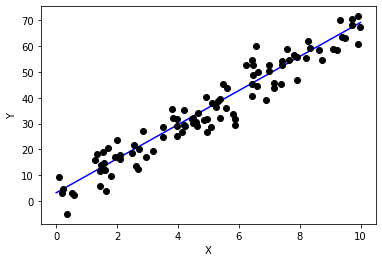

In [3]:
plt.plot([0, 10], theta_0 + theta_1 * [0, 10], 'b-')
plt.plot(x, y, 'ro', color='black')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Train Model

In [4]:
class Linear:
    r'''Linear model for linear regression'''
    weight = np.random.normal(0, 0.01, 1)
    bias = np.zeros(1)

    def __call__(self, x: np.ndarray):
        return self.weight * x + self.bias
    
def MSELoss(pred: np.ndarray, label: np.ndarray):
    return (pred - y) ** 2 / (2 * pred.shape[0])

epoch = 5000
learning_rate = 5e-3

model = Linear()

losses = []
weights = []
biases = []


for step in tqdm(range(1, epoch+ 1)):
    # MSELoss
    loss: np.ndarray = MSELoss(model(x), y)
        
    # Backpropagation Loss
    d_bias = (model(x) - y).mean()
    d_weight = ((model(x) - y) * x).mean()
    
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * d_bias
    temp_weight = model.weight - learning_rate * d_weight
    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight

    losses += [loss.mean().item()]
    weights += [model.weight.item()]
    biases += [model.bias.item()]
    
    if step % 3000 == 0:
        learning_rate = learning_rate / 2


100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 27697.97it/s]


### Linear Model
$ y = \theta_0 + \theta_1 * x$  
initial parameter is $\theta_0 = 0, \theta_1 \backsim N(0, 0.01^2)$

### Objective function: MSELoss  
$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  

### Gradient Descent Algorithm  
$ \theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) $  
$ \theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $

initial learning rate is 5e-3 and decay and decay by 0.5 every 3000 epoch

## Plotting the output results

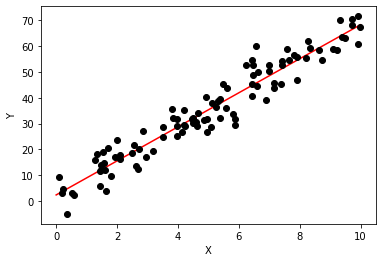

In [5]:
plt.plot([0, 10], model.bias + model.weight * [0, 10], 'r')
plt.plot(x, y, 'ro', color='black')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

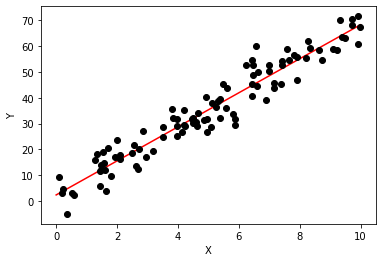

In [6]:
plt.plot([0, 10], model.bias + model.weight * [0, 10], 'r')
plt.plot(x, y, 'ro', color='black')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Plotting the energy values

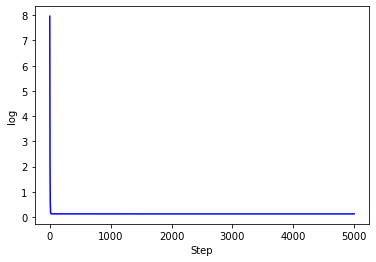

In [7]:
plt.plot(losses, 'b-')
plt.ylabel('log')
plt.xlabel('Step')
plt.show()

## Plotting the model parameters

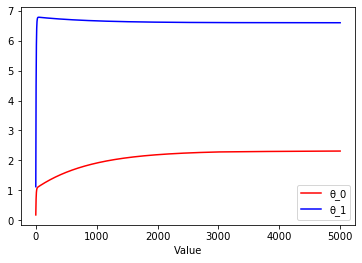

In [8]:
bias_plot = plt.plot(biases, 'r')
weight_plot = plt.plot(weights, 'b')
plt.xlabel('Step')
plt.xlabel('Value')
plt.legend((bias_plot[0], weight_plot[0]), ('θ_0', 'θ_1'))

plt.show()